In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ad=pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ad.shape

(200, 4)

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

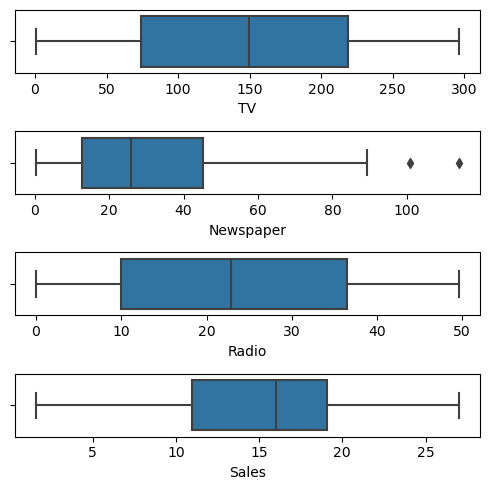

In [20]:
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(x=ad['TV'], ax = axs[0])
plt2 = sns.boxplot(x=ad['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=ad['Radio'], ax = axs[2])
plt3 = sns.boxplot(x=ad['Sales'], ax = axs[3])


plt.tight_layout()

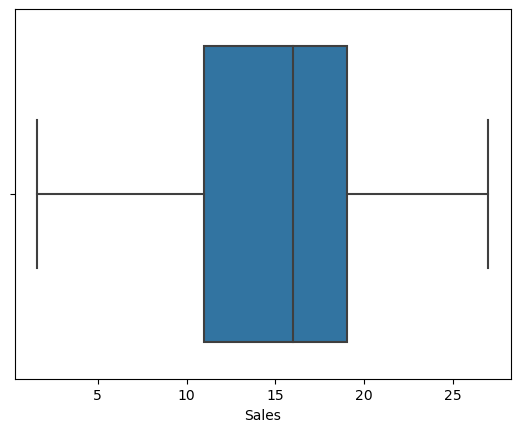

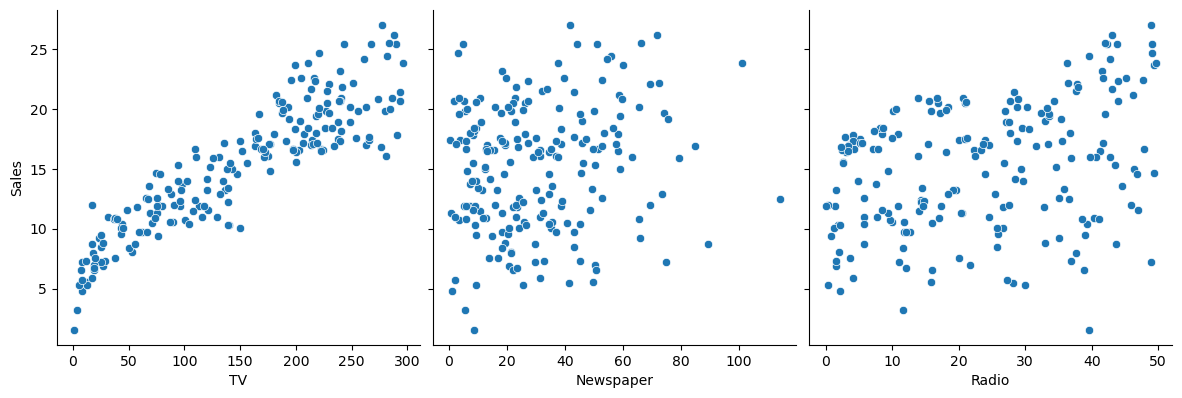

In [17]:
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

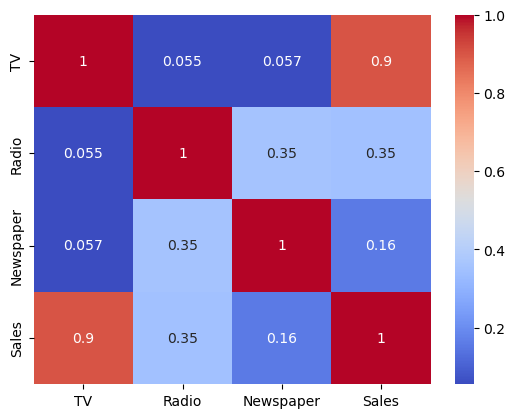

In [24]:
sns.heatmap(ad.corr(),cmap='coolwarm',annot=True)
plt.show()

In [50]:
x=ad.drop(columns=['Sales'])
y=ad['Sales']

In [51]:
from sklearn.model_selection import train_test_split as ttsplit
X_train,X_test,y_train,y_test=ttsplit(x,y,train_size=0.7,test_size=0.3,random_state=67)

In [52]:
X_train.head()

,TV,Radio,Newspaper
122,224.0,2.4,15.6
72,26.8,33.0,19.3
76,27.5,1.6,20.7
112,175.7,15.4,2.4
196,94.2,4.9,8.1


In [53]:
y_train.head()

122    16.6
72      8.8
76      6.9
112    17.1
196    14.0
Name: Sales, dtype: float64

In [54]:
print(X_train.shape)  
print(y_train.shape)  

(140, 3)
(140,)


In [55]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred=lr.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f'Mean Squared Error: {mse}')  
print(f'R^2 Score: {r2}')  

Mean Squared Error: 3.4031964007980147
R^2 Score: 0.8890887325580863


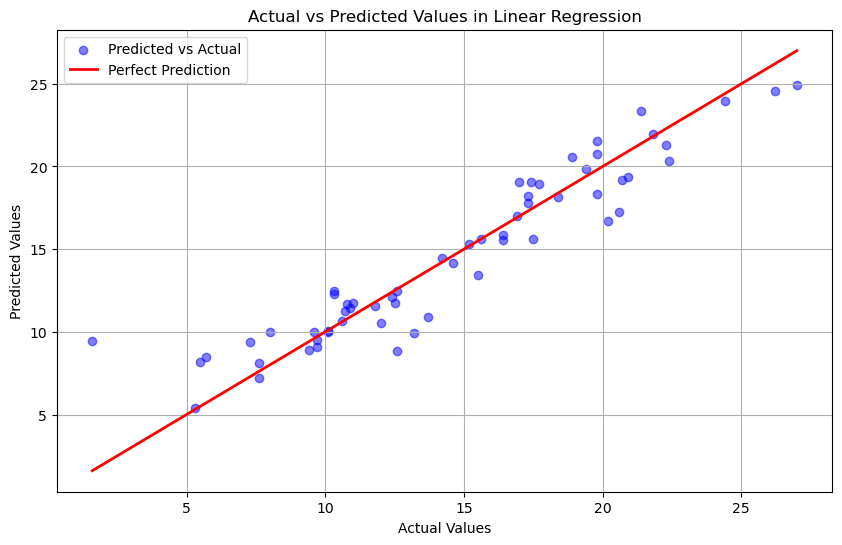

In [58]:
# Import the necessary library for plotting  
import matplotlib.pyplot as plt  

# Step 1: Create a scatter plot of actual vs predicted values  
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')  

# Step 2: Plot a line for perfect predictions  
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Perfect Prediction')  

# Step 3: Label the axes and add title  
plt.xlabel('Actual Values')  
plt.ylabel('Predicted Values')  
plt.title('Actual vs Predicted Values in Linear Regression')  
plt.legend()  
plt.grid(True)  

# Step 4: Show the plot  
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'